In [1]:
import pandas as pd
import requests
import numpy as np

from math import sqrt

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, r2_score

import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing, linear_model, model_selection
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

from sklearn.preprocessing import PolynomialFeatures

df=pd.read_csv('clean-df.csv')
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

df2=df.copy()
df2

,price,year built,sqft,beds,bathroom,price_sqft,grage,HOA Fees,Address,Time On Web,sqft lot,Condo,Multi-Family,Single Family,Townhome
0,249500,1885.0,1512.0,3.0,2.5,165.0,2,205.000000,"1321 S Christiana Ave, Chicago, IL 60623",1,3125.0,0,0,1,0
1,128250,1942.0,1520.0,4.0,2.0,84.0,1,551.138838,"10119 S Saint Lawrence Ave, Chicago, IL 60628",1,3751.0,0,0,1,0
2,79000,1973.0,575.0,1.0,1.0,137.0,0,316.000000,"3001 S Michigan Ave Unit 1606, Chicago, IL 60616",1,575.0,1,0,0,0
3,325000,1925.0,3125.0,6.0,3.0,104.0,2,175.000000,"5028 W Adams St, Chicago, IL 60644",1,3125.0,0,1,0,0
4,275000,1953.0,1893.0,4.0,2.0,145.0,2,551.138838,"639 E 100th St, Chicago, IL 60628",1,3751.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268,469000,1922.0,1650.0,2.0,2.0,284.0,0,431.000000,"559 W Roscoe St Unit 2W, Chicago, IL 60657",62,1650.0,1,0,0,0
2269,249900,1905.0,1092.0,3.0,1.0,229.0,2,288.000000,"4516 N Central Ave, Chicago, IL 60630",62,4487.0,0,0,1,0
2270,249900,1908.0,1150.0,1.0,1.0,217.0,0,491.000000,"900 S Wabash Ave Apt 704, Chicago, IL 60605",120,1150.0,1,0,0,0
2271,97950,1944.0,1196.0,3.0,1.5,82.0,0,300.000000,"9942 S Luella Ave, Chicago, IL 60617",96,4961.0,0,0,1,0


In [2]:
# נשתמש ברגרסיה לינארית 
X = df2.drop(['price'], axis=1)
y = df2['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


X_train_new=X_train.drop(['Address'], axis=1)
X_test_new=X_test.drop(['Address'], axis=1)

regressor = LinearRegression()
regressor.fit(X_train_new, y_train)

y_pred_new = regressor.predict(X_test_new)

print('R2 on train set:',regressor.score(X_train_new, y_train))
print('R2 on test set:',regressor.score(X_test_new, y_test))
mse = mean_squared_error(y_test, y_pred_new)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

R2 on train set: 0.8701787351674446
R2 on test set: 0.8944195369988163
RMSE: 43824.75764357163


In [3]:
#יצרנו דאטה פריים בה שמנו את המחירים החזויים מול המחירים האמיתיים ואת ההפרש ביניהם ואת הפרמטרים עם הקורלציה הכי גבוהה 
resDF=pd.DataFrame({"address":X_test['Address'],"Actual_Price":y_test,"Predicted_Price":y_pred_new,'sqft':X_test['sqft'],'year built':X_test['year built'],'beds':X_test['beds'],'bathroom':X_test['bathroom'],"Actual":y_test,"Predicted":y_pred_new})
resDF["diffrence"]=abs(resDF["Actual_Price"]-resDF["Predicted_Price"])
resDF.sort_values(by=['diffrence'], ascending=True, inplace = True)
resDF

,address,Actual_Price,Predicted_Price,sqft,year built,beds,bathroom,Actual,Predicted,diffrence
333,"1321 S Christiana Ave, Chicago, IL 60623",249500,249590.728459,1512.0,1885.0,3.0,2.5,249500,249590.728459,90.728459
891,"3807 N Linder Ave Unit 1, Chicago, IL 60641",185000,184853.570294,857.0,1923.0,2.0,1.0,185000,184853.570294,146.429706
1412,"3148 S Wells St Unit 2, Chicago, IL 60616",344900,344679.266267,1275.0,2007.0,2.0,2.0,344900,344679.266267,220.733733
1122,"3500 N Keating Ave, Chicago, IL 60641",349500,350257.641689,1473.0,1912.0,4.0,2.5,349500,350257.641689,757.641689
529,"9237 S Peoria St, Chicago, IL 60620",239900,240831.372930,1175.0,1947.0,2.0,2.0,239900,240831.372930,931.372930
...,...,...,...,...,...,...,...,...,...,...
1521,"2640 W 23rd Pl, Chicago, IL 60608",499900,375718.988708,2976.0,1898.0,4.0,2.0,499900,375718.988708,124181.011292
489,"9039 S Cornell Ave, Chicago, IL 60617",185000,311455.943428,3075.0,1952.0,3.0,2.0,185000,311455.943428,126455.943428
1971,"6922 S Jeffery Blvd Apt 7N, Chicago, IL 60649",194000,338619.250148,3000.0,1927.0,3.0,2.5,194000,338619.250148,144619.250148
1489,"932 S Leavitt St, Chicago, IL 60612",574900,420095.794273,3049.0,1885.0,5.0,2.0,574900,420095.794273,154804.205727


,address,Actual_Price,Predicted_Price,diffrence
333,"1321 S Christiana Ave, Chicago, IL 60623",249500,249590.728459,90.728459
891,"3807 N Linder Ave Unit 1, Chicago, IL 60641",185000,184853.570294,146.429706
1412,"3148 S Wells St Unit 2, Chicago, IL 60616",344900,344679.266267,220.733733
1122,"3500 N Keating Ave, Chicago, IL 60641",349500,350257.641689,757.641689
529,"9237 S Peoria St, Chicago, IL 60620",239900,240831.372930,931.372930
1658,"9237 S Peoria St, Chicago, IL 60620",239900,240857.126376,957.126376
1285,"6550 S Perry Ave, Chicago, IL 60621",269900,270865.156630,965.156630
1523,"6700 S South Shore Dr Apt 12K, Chicago, IL 60649",108500,107506.167287,993.832713
1374,"2018 N Spaulding Ave Apt 1W, Chicago, IL 60647",149900,148876.961338,1023.038662
768,"830 N Fairfield Ave, Chicago, IL 60622",350000,351059.212315,1059.212315


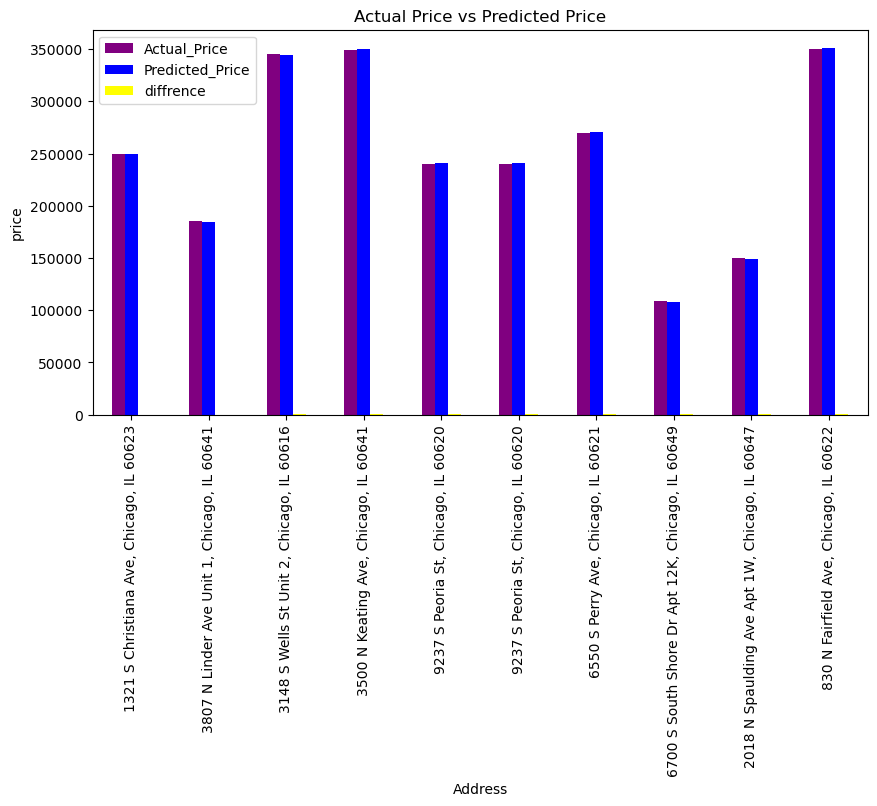

In [4]:
#החיזויים הכי מדוייקים
viz_df = resDF[['address','Actual_Price','Predicted_Price', 'diffrence']]
viz_df.head(10).plot(kind='bar', x='address', figsize=(10,5), color = ['purple','blue','yellow'])
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Address')
plt.ylabel('price')
viz_df.head(10)

,address,Actual_Price,Predicted_Price,diffrence
789,"1850 N Clark St Apt 510, Chicago, IL 60614",179000,289730.053393,110730.053393
582,"11336 S Forest Ave, Chicago, IL 60628",119000,231977.471001,112977.471001
667,"1532 W Fry St Apt 3, Chicago, IL 60642",594500,480631.908941,113868.091059
2040,"5034 N Tripp Ave, Chicago, IL 60630",569000,454417.376310,114582.623690
791,"7152 N Mason Ave, Chicago, IL 60646",599000,482290.217684,116709.782316
1521,"2640 W 23rd Pl, Chicago, IL 60608",499900,375718.988708,124181.011292
489,"9039 S Cornell Ave, Chicago, IL 60617",185000,311455.943428,126455.943428
1971,"6922 S Jeffery Blvd Apt 7N, Chicago, IL 60649",194000,338619.250148,144619.250148
1489,"932 S Leavitt St, Chicago, IL 60612",574900,420095.794273,154804.205727
379,"3127 N Elston Ave, Chicago, IL 60618",554900,384088.944988,170811.055012


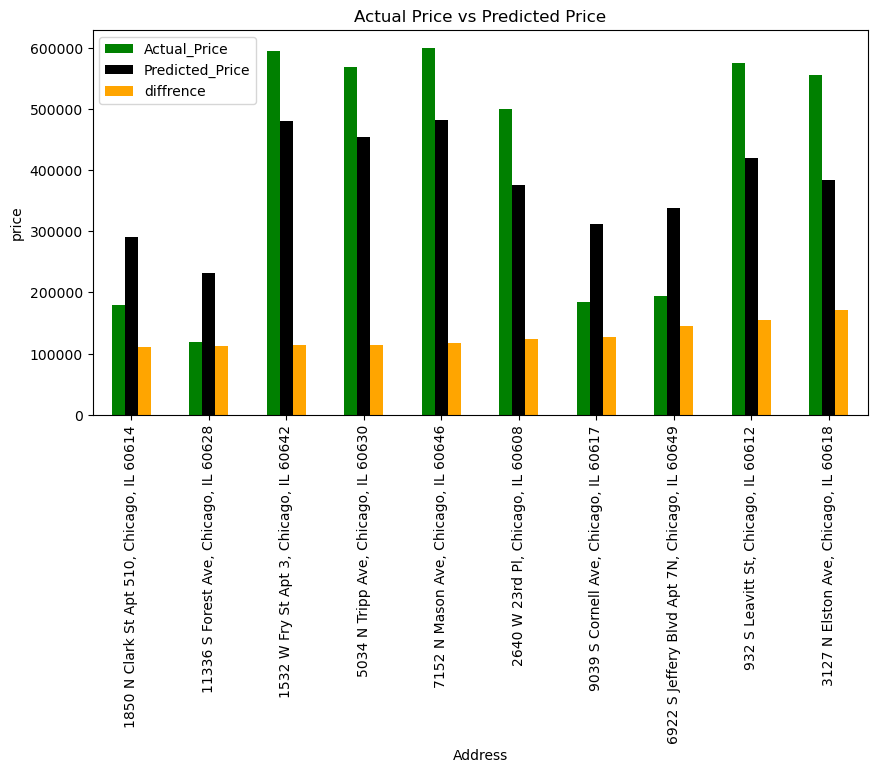

In [7]:
#החיזויים הכי פחות מדוייקים 
viz_df = resDF[['address','Actual_Price','Predicted_Price','diffrence']]
viz_df.tail(10).plot(kind='bar', x='address', figsize=(10,5), color = ['green','black', 'orange'])
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Address')
plt.ylabel('price')
viz_df.tail(10)

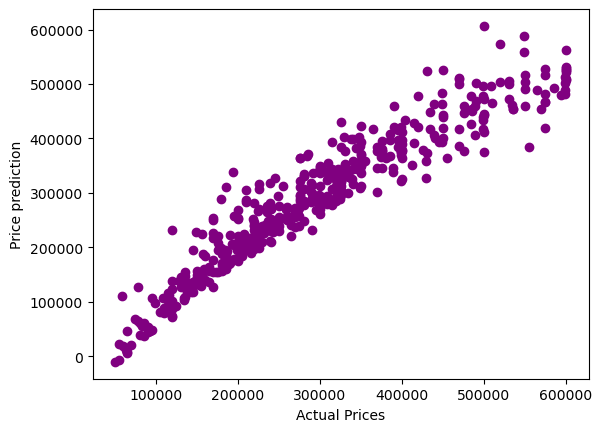

In [8]:
#גרף סקאטר פלוט שמראה את הערכים האמיתיים מול חזויים 
plt.scatter(resDF['Actual_Price'], resDF['Predicted_Price'], color='purple', edgecolors='purple')
plt.xlabel("Actual Prices")
plt.ylabel("Price prediction")
plt.show()